<a target="_blank" href="https://colab.research.google.com/github/Ganymede-Bio/bio-curve-fit/blob/main/examples/five_pl_logistic/five_pl_fit.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
! pip install bio-curve-fit


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot as plt
from bio_curve_fit.logistic import FourParamLogistic, FiveParamLogistic

# Fitting a Five-Parameter Logistic Model to Create a Standard Curve using `bio-curve-fit`

A five-parameter logistic (5PL) regression model is often preferred over a simpler four-parameter logistic (4PL) model for fitting biological data because it introduces an additional asymmetry parameter. Biological assays, such as dose-response curves or immunoassays, frequently exhibit slight asymmetrical behavior that the 4PL’s symmetric sigmoid curve cannot capture. By allowing for this extra degree of freedom, the 5PL model can more accurately describe the real-world shape of the response, leading to better fits and more reliable parameter estimates.

In the following notebook we will compare performance of a 5PL and 4PL regression model for asymmetrical data. Let's imagine we have 20 samples with a known concentration (standards) of an analyte. We've tested these standards, in triplicate, on an appropriate instrument and recorded the observed response signal. 

In [3]:
standard_curve_csv = """
known_concentration,instrument_response
0.01,0.002069117990872958
0.01,0.0020132494933515024
0.01,0.0021169840704374815
0.01438449888287663,0.001959532926455008
0.01438449888287663,0.0019884553193551735
0.01438449888287663,0.0019444061051506441
0.0206913808111479,0.0019060618132396786
0.0206913808111479,0.001948195812428334
0.0206913808111479,0.0018817446798727263
0.029763514416313176,0.0020199075226226327
0.029763514416313176,0.00208893443732371
0.029763514416313176,0.0020935290065508014
0.04281332398719394,0.00232136833694934
0.04281332398719394,0.0023468274954318875
0.04281332398719394,0.0023670255256337098
0.06158482110660264,0.002350039420066734
0.06158482110660264,0.0024226848713439883
0.06158482110660264,0.002328199275919817
0.08858667904100823,0.0034268951061987517
0.08858667904100823,0.0033724552342330205
0.08858667904100823,0.003333991357245253
0.12742749857031335,0.005976982077588455
0.12742749857031335,0.005894796802448098
0.12742749857031335,0.006183810672175324
0.18329807108324356,0.01429016019812947
0.18329807108324356,0.014007072131872945
0.18329807108324356,0.01451425437925086
0.26366508987303583,0.03919501065794866
0.26366508987303583,0.03816319608099027
0.26366508987303583,0.04029788595266494
0.37926901907322497,0.11012486126580442
0.37926901907322497,0.10773997727674114
0.37926901907322497,0.11289584492731791
0.5455594781168517,0.28788349523919826
0.5455594781168517,0.2874878807698649
0.5455594781168517,0.2806375306078681
0.7847599703514611,0.6293705171187065
0.7847599703514611,0.6292218560816774
0.7847599703514611,0.6107084160933515
1.1288378916846884,1.0942268483928872
1.1288378916846884,1.0779629449846204
1.1288378916846884,1.1151270114916647
1.623776739188721,1.5682314346793895
1.623776739188721,1.544967383412808
1.623776739188721,1.540068595980988
2.3357214690901213,1.9810187452329917
2.3357214690901213,1.9494269607495571
2.3357214690901213,1.9408931920431431
3.359818286283781,2.3179681138726
3.359818286283781,2.395117528971509
3.359818286283781,2.2504633190845866
4.832930238571752,2.5871131435953965
4.832930238571752,2.6507642395678666
4.832930238571752,2.6777030295287907
6.951927961775605,2.8003648496549087
6.951927961775605,2.8517696956036693
6.951927961775605,2.8775895443122463
10.0,2.968849253649377
10.0,3.032484862793274
10.0,2.896894467504049
"""

df = pd.read_csv(io.StringIO(standard_curve_csv))
df

,known_concentration,instrument_response
0,0.010000,0.002069
1,0.010000,0.002013
2,0.010000,0.002117
3,0.014384,0.001960
4,0.014384,0.001988
5,0.014384,0.001944
6,0.020691,0.001906
7,0.020691,0.001948
8,0.020691,0.001882
9,0.029764,0.002020


<Axes: xlabel='known_concentration', ylabel='instrument_response'>

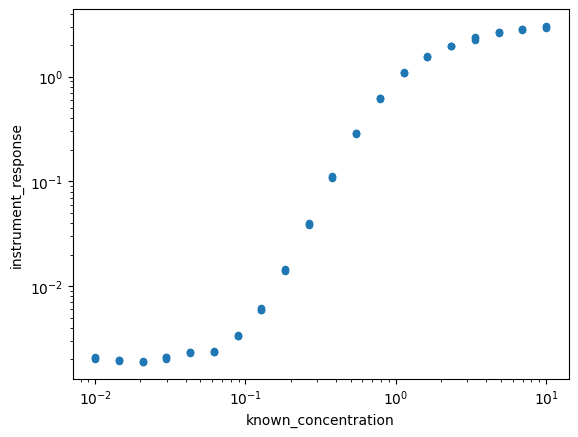

In [4]:
df.plot.scatter(x="known_concentration", y="instrument_response", logx=True, logy=True)

Next we'd like to fit a standard curve to these data to estimate the concentration of an unknown sample given its observed response signal. Per the plot, we clearly need a non-linear model to fit the data.

To do this, we'll use the `bio-curve-fit` package to fit a four-parameter and five-parameter logistic model to the data. Both models are used to fit dose-response data and are defined as:

$$f(x) = \frac{A-D}{1+\left(\frac{x}{C}\right)^B}+D$$

                                                
and

$$f(x) = D + \frac{A - D}{\left(1 + \left(\frac{x}{C}\right)^B\right)^S}$$

respectively.

`bio-curve-fit` will find the values for the parameters $A$, $B$, $C$, $D$, and $S$ that best fit the example data above.

In [5]:
# instantiate a 4PL model object
four_pl_model = FourParamLogistic()

x = df["known_concentration"]
y = df["instrument_response"]


# fit the model using the data
four_pl_model.fit(x, y, weight_func=FourParamLogistic.inverse_variance_weight_function)
four_pl_model

NameError: name 'FourPLLogistic' is not defined

In [6]:
# instantiate a 5PL model object
five_pl_model = FiveParamLogistic()

x = df["known_concentration"]
y = df["instrument_response"]

# fit the model using the data
five_pl_model.fit(x, y, weight_func=FiveParamLogistic.inverse_variance_weight_function)
five_pl_model

required param is: A
param predicted was: 0.0020069022188437735
required param is: B
param predicted was: 3.087040743897787
required param is: C
param predicted was: 0.6903074268899858
required param is: D
param predicted was: 3.689490114425458
required param is: E
param predicted was: 0.20269436536413643
param dict is: {'A': 0.0020069022188437735, 'B': 3.087040743897787, 'C': 0.6903074268899858, 'D': 3.689490114425458, 'E': 0.20269436536413643}


/Users/nickflores_ganymede/PycharmProjects/bio-curve-fit/bio_curve_fit/logistic.py:517: RuntimeWarning: invalid value encountered in power
  z = (np.sign(x / C) * np.abs(x / C)) ** B


FiveParamLogistic(A=0.0020069022188437735, B=3.087040743897787,
                  C=0.6903074268899858, D=3.689490114425458,
                  E=0.20269436536413643)

Note that when we performed the fit, we provided a weight function based on the magnitude of observed values. This weight scheme ensures our model is not biased towards high signal values--this is especially important because our data spans several orders of magnitude. You can provide your own preferred weight function during fitting.


Both models have been fit to the data, and the best-fit parameters are visible above. The parameters can also be accessed individually:

In [7]:
five_pl_model.params["A"]

0.0020069022188437735

Since `bio-curve-fit` conforms with the scikit-learn API, we can easily check the $R^2$ using the `score()` method:

In [8]:
five_pl_model.score(x, y)

0.9994288892281544

The model fit also calculates upper and lower limits of detection:

In [9]:
print("Lower Limit of Detection: ", five_pl_model.LLOD_y_)
print("Upper Limit of Detection: ", five_pl_model.ULOD_y_)

Lower Limit of Detection:  0.0021382706955215
Upper Limit of Detection:  2.9972350868144138


The default methodology is to use a value 2.5 standard deviations above the fitted curve as the lower limit of detection (where "standard deviation" is the standard deviation of the the lowest concentration standard replicates). The upper limit of detection is calculated as the highest concentration standard.

> Note: You can create your own methodology for calculating the LODs by passing a custom LOD function function into the `fit()` method. See [the code](../../bio_curve_fit/logistic.py) for more details.

Finally, let's plot the data and the fitted models:

In [10]:
def generate_log_spaced_values(start, stop, num_points=100):
    # Calculate the logarithmic range
    log_start = np.log10(start)
    log_stop = np.log10(stop)

    return np.logspace(log_start, log_stop, num_points)


smoothed_x_values = generate_log_spaced_values(
    min(df["known_concentration"]), max(df["known_concentration"]), 100
)

four_pl_data = four_pl_model.predict(smoothed_x_values)
five_pl_data = five_pl_model.predict(smoothed_x_values)

plt.figure(figsize=(10, 6))
plt.scatter(
    df["known_concentration"],
    df["instrument_response"],
    color="blue",
    alpha=0.6,
    label="Raw Data",
)

# Plot the true model curve
plt.plot(
    smoothed_x_values,
    five_pl_data,
    color="red",
    linestyle="--",
    linewidth=2,
    label="Predicted 5PL Model",
)
plt.plot(
    smoothed_x_values,
    four_pl_data,
    color="green",
    linestyle="--",
    linewidth=2,
    label="Predicted 4PL Model",
)

# Labels and title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.xscale("log")
plt.yscale("log")
plt.title(f"Measured Data and Predicted Models")
plt.legend()
plt.show()

ValueError: Model is not fit yet. Please call 'fit' with appropriate data or initialize the model object with non-null parameters.

While somewhat subtle, close observation reveals superior performance of the 5PL model for higher concentration samples. Plotting the residuals for each model more clearly demonstrates the superior performance of the 5PL model.



In [11]:
df["4PL_predicted"] = four_pl_model.predict(df["known_concentration"])
df["5PL_predicted"] = five_pl_model.predict(df["known_concentration"])
df["4PL_residual"] = df["instrument_response"] - df["4PL_predicted"]
df["5PL_residual"] = df["instrument_response"] - df["5PL_predicted"]

ValueError: Model is not fit yet. Please call 'fit' with appropriate data or initialize the model object with non-null parameters.

In [12]:
plt.figure(figsize=(8, 5))

plt.bar(
    df["known_concentration"], df["4PL_residual"], color="skyblue", label="4PL Residual"
)
plt.bar(
    df["known_concentration"], df["5PL_residual"], color="red", label="5PL Residual"
)

plt.xscale("log")
plt.xlabel("Known Concentration")
plt.ylabel("Residual")
plt.legend()
plt.grid()
plt.title("Residuals by Concentration")

plt.show()

KeyError: '4PL_residual'

<Figure size 800x500 with 0 Axes>

Satisfied with our model, we can now predict concentrations for our experimental samples.

In [ ]:
newly_measured_responses = [0.005, 0.0124, 2.14, 1.10, 0.872]
five_pl_model.predict_inverse(newly_measured_responses)

Note that we use the `predict_inverse()` function because we are predicting the concentration of the unknown samples from the measured signal.